# Dasar-Dasar Modul Seaborn

Python memiliki sejumlah paket visualisasi yang tersedia dengan berbagai fitur. Sejumlah paket merupakan general-purpose sedangkan yang lainnya merupakan paket spesifik.

Paket visualisasi populer python, antara lain:

1. [Matplotlib](https://matplotlib.org/) : Paket visualisasi original yang dimiliki oleh python. Sebagian besar paket visualisasi selanjutnya dibangun di atas matplotlib.
2. [Seaborn](https://matplotlib.org/) : *High-level* visualization yang dibangun di atas matplotlib.
3. [ggplot](http://ggplot.yhathq.com/) : Di dasarkan pada paket ggplot di R.
4. [Plotly](https://plotly.com/python/) : Berguna untuk visualisasi yang cukup bersih dan interaktif serta memiliki fitur tampilan visualisasi untuk publikasi ilmiah.
5. [Bokeh](https://docs.bokeh.org/en/latest/index.html) : Sama dengan Plotly, cukup bagus untuk visualisasi interaktif untuk aplikasi web.

Pada tutorial kali ini, kita akan fokus mempelajari visualisasi menggunakan Seaborn dengan dataset yang telah dimiliki oleh paketnya sendiri.

In [1]:
!pip install seaborn

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Memuat Dataset

Seaborn memiliki sejumlah dataset yang cukup bagus digunakan untuk latihan visualisasi data.

In [7]:
#Print the list of data sets available in seaborn
tips_df = sns.load_dataset('tips')
flights_df = sns.load_dataset('flights')
iris_df = sns.load_dataset('iris')

Cek ringkasan dataset.

In [6]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [8]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualisasi Distribusi Data

Visualisasi distribusi data dapat divisualisasikan menggunakan histogram atau density plot untuk data numerik kontinu dan barplot untuk data kategori.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


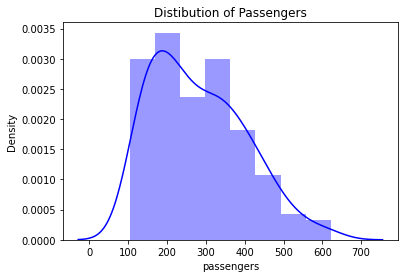

In [14]:
sns.distplot(flights_df.passengers, color='blue')
plt.title('Distibution of Passengers')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


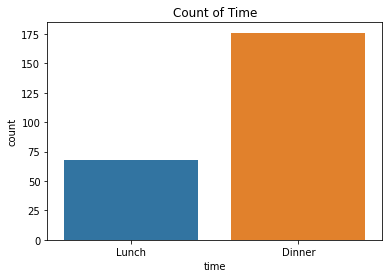

In [17]:
sns.countplot(tips_df.time)
plt.title('Count of Time')
plt.show()

## Visualisasi Kovarian

Visualisasi korelasi atau kovarian antara dua buah variabel dapat menggunakan scatterplot (kontinu vs kontinu) dan histogram (kategori vs kontinu).

### Scatterplot

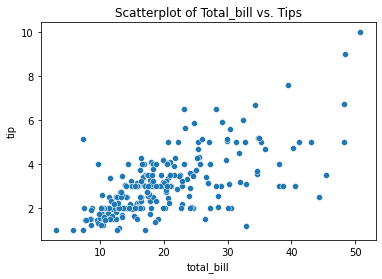

In [18]:
sns.scatterplot(x='total_bill', y='tip', data=tips_df) 
plt.title("Scatterplot of Total_bill vs. Tips")
plt.show()

Kita dapat pula menambahkan histogram yang menggambarkan distribusi nilai masing-masing variabel.

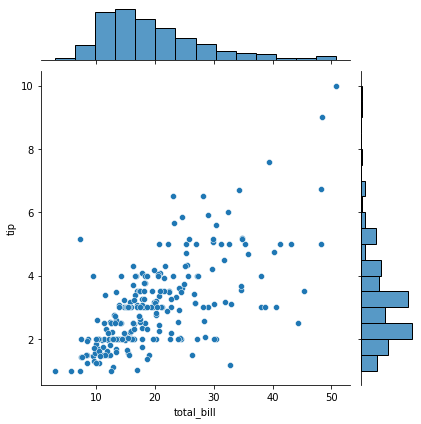

In [19]:
sns.jointplot(x='total_bill', y='tip', data=tips_df)
plt.show()

Jika kita memiliki data yang cukup besar dan berpotensi menyebabkan adanya overplotting (titik yang saling berimpit), kita daoat menggunakan hex atau kde pada visualisasi distribusi korelasi.

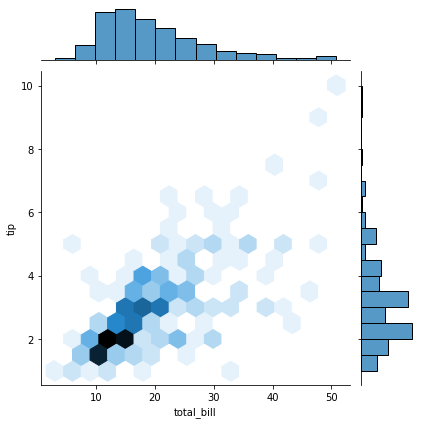

In [20]:
sns.jointplot(x='total_bill', y='tip', data=tips_df, kind='hex')
plt.show()

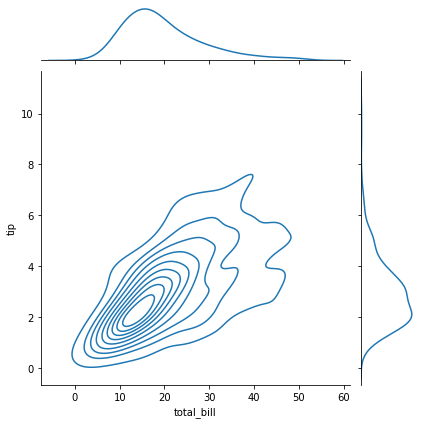

In [21]:
sns.jointplot(x='total_bill', y='tip', data=tips_df, kind='kde')
plt.show()

### Boxplot

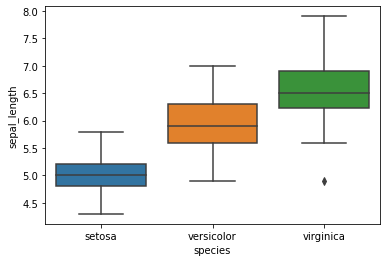

In [22]:
sns.boxplot(x='species', y='sepal_length',  data=iris_df)
plt.show()

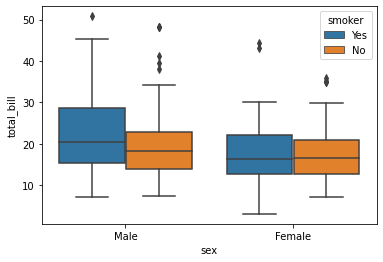

In [23]:
sns.boxplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips_df)
plt.show()

### Violin Plot

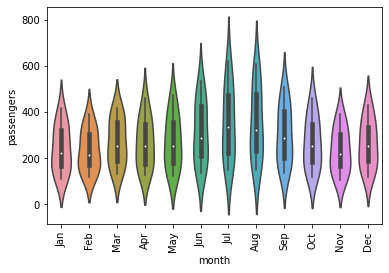

In [24]:
sb.violinplot(x='month', y='passengers', data=flights_df)
plt.xticks(rotation=90)
plt.show()

### Scatterplot Matrix

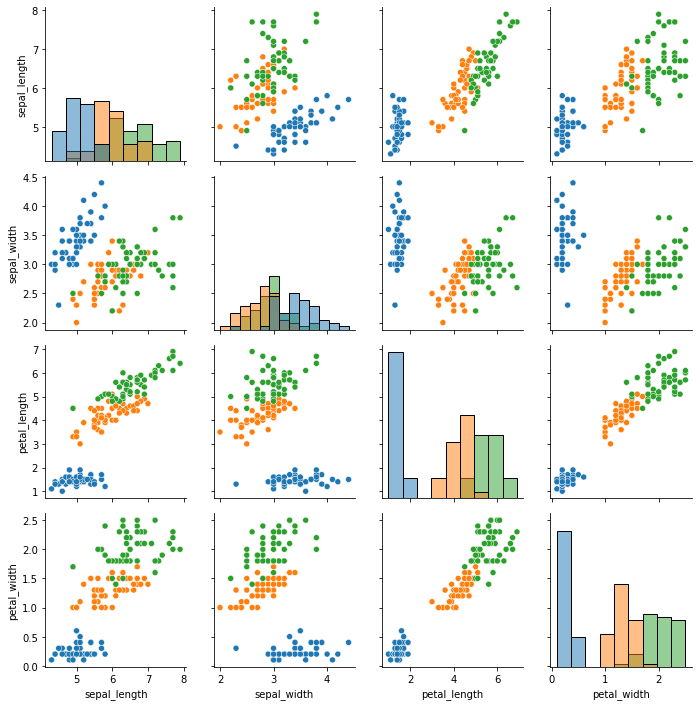

In [26]:
g = sns.PairGrid(iris_df, hue = 'species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

## Facet Grid

Membagi visualisasi menjadi kelompok kecil dapat dilakukan menggunakan fungsi FacetGrid.

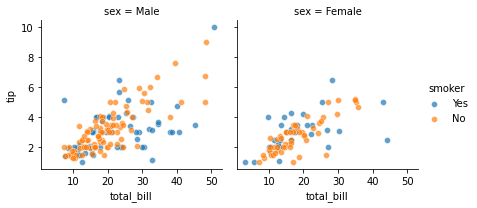

In [28]:
g = sns.FacetGrid(tips_df, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

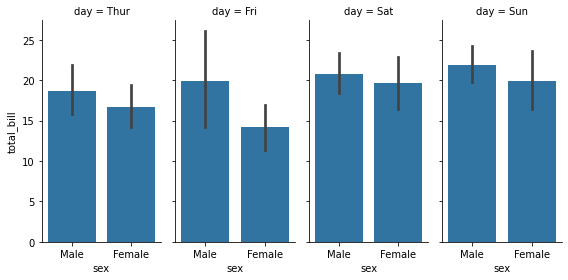

In [29]:
g = sns.FacetGrid(tips_df, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])

## Visualisasi Time Series

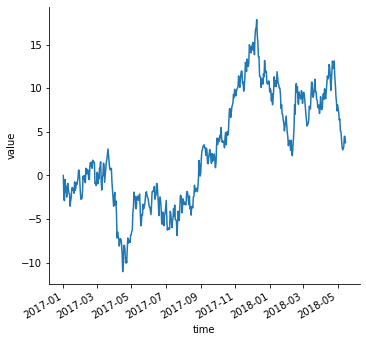

In [30]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

## Referensi

1. [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)